<a href="https://colab.research.google.com/github/Kaderbalde/Data_processing/blob/main/Features_scalling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn  import datasets
from sklearn.preprocessing import MinMaxScaler,  StandardScaler , RobustScaler

In [33]:
sns.set_theme(rc = {"figure.figsize": (14,4)})

**Telechargement du dataset des données de diabetes**

In [34]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
print(df.shape)
draft = df = df[['bmi', 's1', 's2', 's3', 's4', 's5', 's6']]

(442, 10)


In [35]:
df.head()

,bmi,s1,s2,s3,s4,s5,s6
0,0.061696,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.051474,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.044451,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.011595,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,-0.036385,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


**visualisation des données**

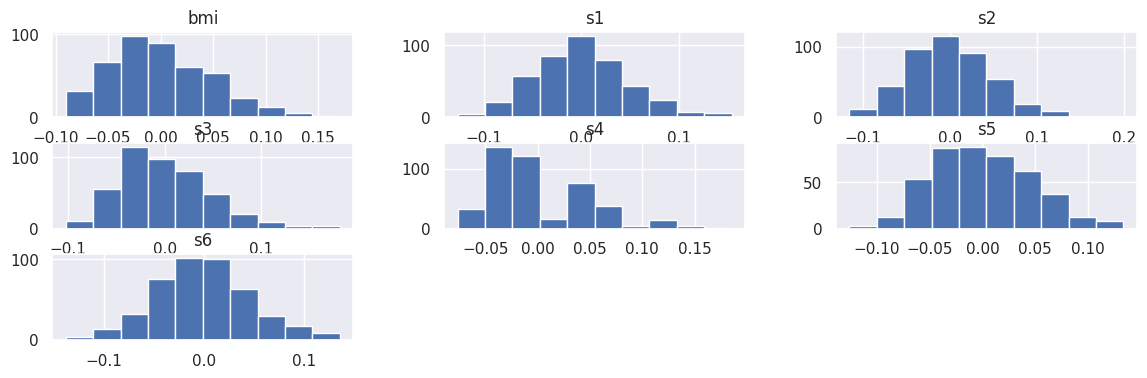

In [36]:
df.hist()
plt.show()

**Statistique**

In [37]:
df.describe()

,bmi,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.245564e-16,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-9.027530e-02,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.422907e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,-7.283766e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.124802e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.705552e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


**Verifier les valeurs aberrantes**

<Axes: >

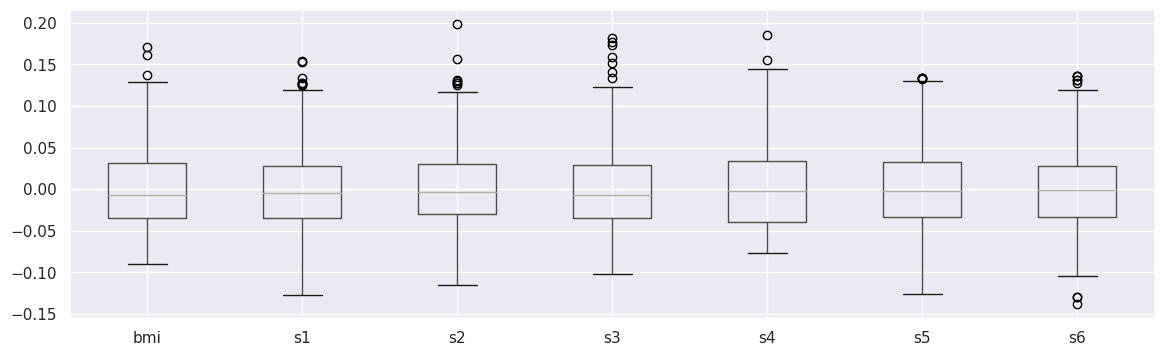

In [38]:
df.boxplot()

**Traitement des valeurs aberrantes**

In [39]:
def drop_outliers(data, colname):
    Q1 = np.percentile(data[colname], 25)
    Q3 = np.percentile(data[colname], 75)
    limit = 1.5*(Q3 - Q1)

    data.drop(data[data[colname] >= (limit + Q3)].index, inplace=True)
    data.drop(data[data[colname] <= (Q1 - limit)].index, inplace=True)

In [40]:
for colname in df.columns:
    drop_outliers(df, colname)

**Vérification du remplacement des valeurs aberrrantes**

<Axes: >

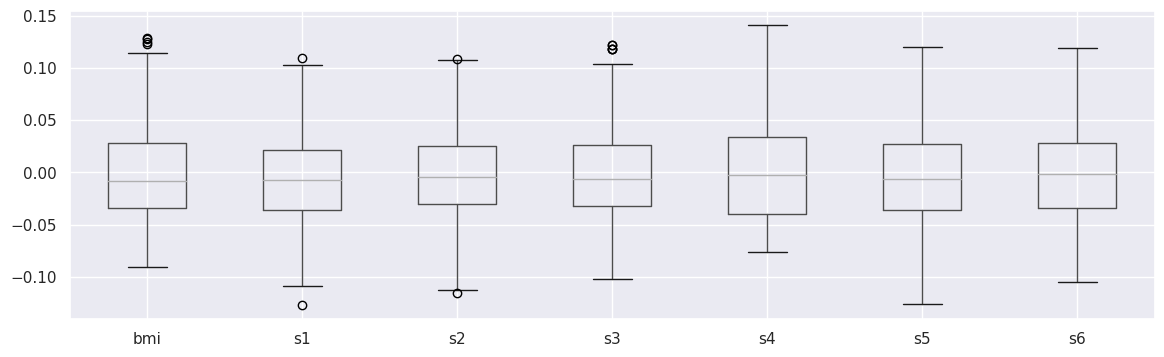

In [41]:
df.boxplot()

**Application de la methode Normalisation sur les donnnees**
*   Le graphique avant l'application de la methode MinMaxScaler



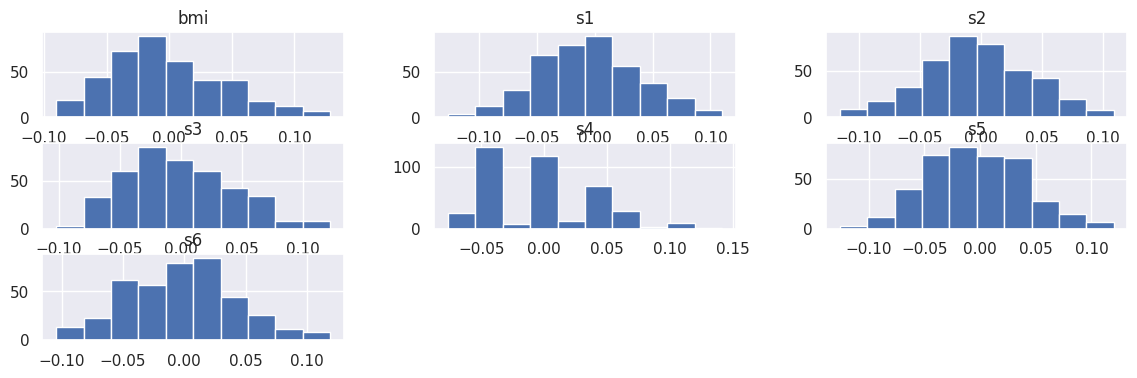

In [42]:
df.hist()
plt.show()

Statistique

In [43]:
df.describe()

,bmi,s1,s2,s3,s4,s5,s6
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,-0.001748,-0.005194,-0.003217,-0.000789,-0.003800,-0.003999,-0.002244
std,0.045638,0.043174,0.043215,0.043190,0.042420,0.044485,0.044342
min,-0.090275,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.104630
25%,-0.034229,-0.035968,-0.030437,-0.032356,-0.039493,-0.035816,-0.034215
50%,-0.008362,-0.007073,-0.004759,-0.006584,-0.002592,-0.006081,-0.001078
75%,0.028284,0.021822,0.024991,0.026550,0.034309,0.027364,0.027917
max,0.128521,0.109883,0.108914,0.122273,0.141322,0.120051,0.119043


**Creation de sous dataset**

In [44]:
br = df[['bmi', 's1']]

In [45]:
data_norm = pd.DataFrame(MinMaxScaler().fit_transform(br), columns=br.columns)

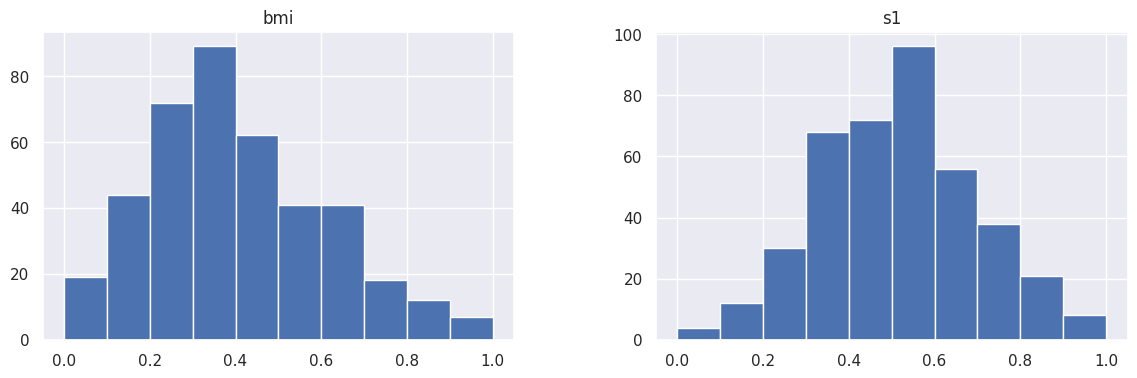

In [46]:
data_norm[['bmi', 's1']].hist()
plt.show()

**Application de la methode STANDARDISATION sur les donnnees**

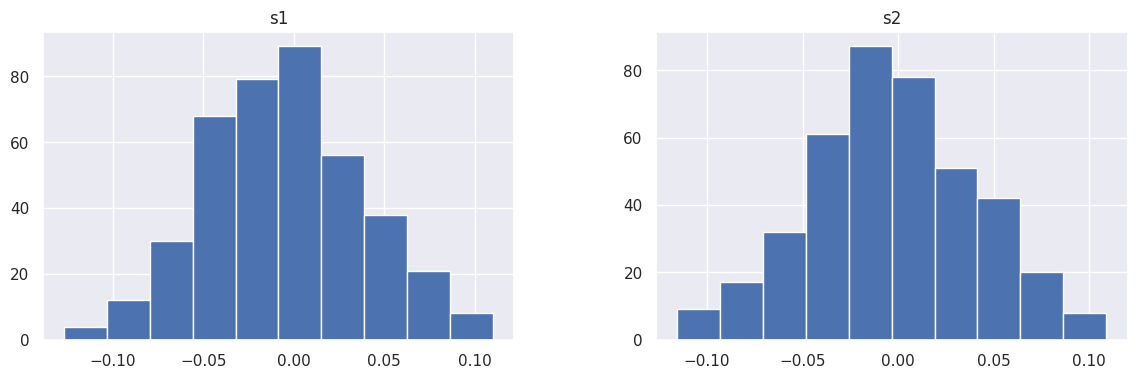

In [47]:
df[['s1', 's2']].hist()
plt.show()

In [48]:
df[['s1', 's2']].describe()

,s1,s2
count,405.000000,405.000000
mean,-0.005194,-0.003217
std,0.043174,0.043215
min,-0.126781,-0.115613
25%,-0.035968,-0.030437
50%,-0.007073,-0.004759
75%,0.021822,0.024991
max,0.109883,0.108914


In [49]:
data = df[['s1', 's2']]

In [50]:
data_std = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)

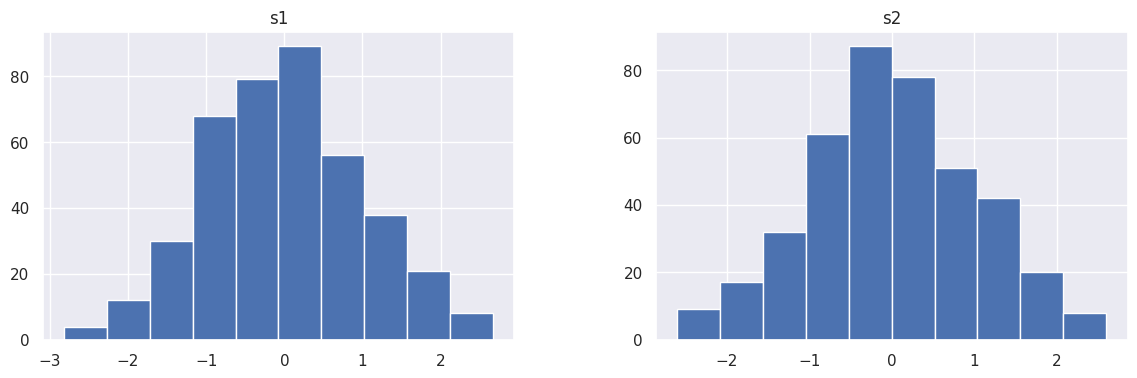

In [51]:
data_std.hist()
plt.show()

**Creation de sous dataset** S4 et S6 pour tester les RobustScaler

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 440
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bmi     405 non-null    float64
 1   s1      405 non-null    float64
 2   s2      405 non-null    float64
 3   s3      405 non-null    float64
 4   s4      405 non-null    float64
 5   s5      405 non-null    float64
 6   s6      405 non-null    float64
dtypes: float64(7)
memory usage: 25.3 KB


Vérirfication des types de données

In [73]:
df_robust = pd.DataFrame(RobustScaler().fit_transform(df), columns = df.columns)

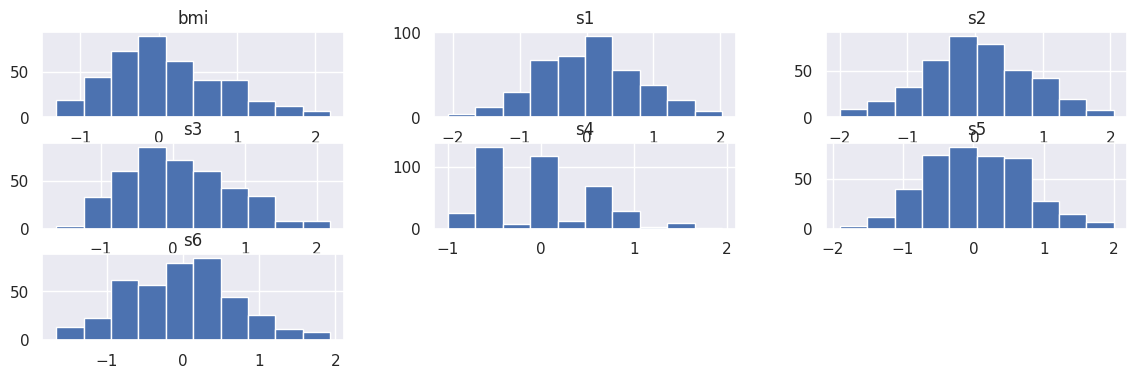

In [75]:
df_robust.hist()
plt.show()